**Вариант 3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency

1. Количественные данные

In [4]:
df1 = pd.read_excel('/content/валюта1.xlsx')
df1.head()

,Дата,Рубль,Тенге,РФ,Казахстан
0,2021-10-02,70.4783,425.70,6.75,9.50
1,2021-11-03,71.4783,427.11,7.50,9.75
2,2021-12-01,74.8926,434.16,7.50,9.75
3,2022-01-15,75.7668,431.80,8.50,10.25
4,2022-02-01,77.4702,433.50,8.50,10.25


        Дата     Рубль     Тенге        РФ  Казахстан
0 2021-10-02 -0.841570 -1.440608 -1.331260  -2.758332
1 2021-11-03 -0.763868 -1.396300 -1.181874  -2.633992
2 2021-12-01 -0.498571 -1.174761 -1.181874  -2.633992
3 2022-01-15 -0.430644 -1.248922 -0.982693  -2.385311
4 2022-02-01 -0.298287 -1.195501 -0.982693  -2.385311


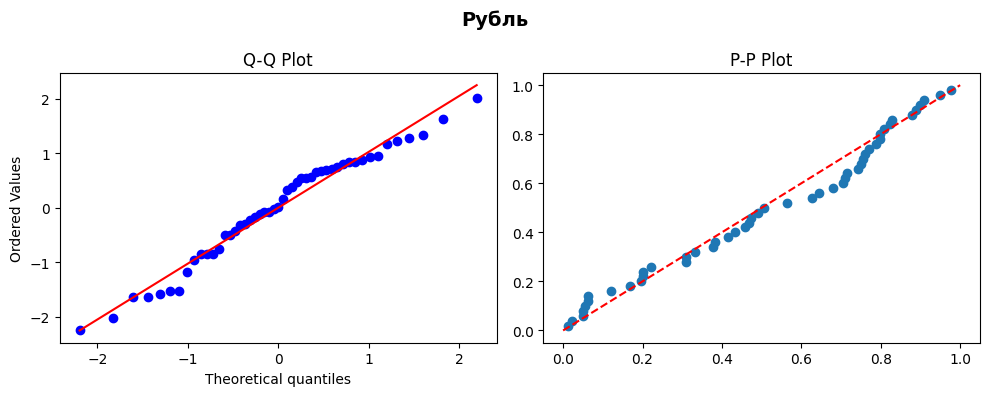

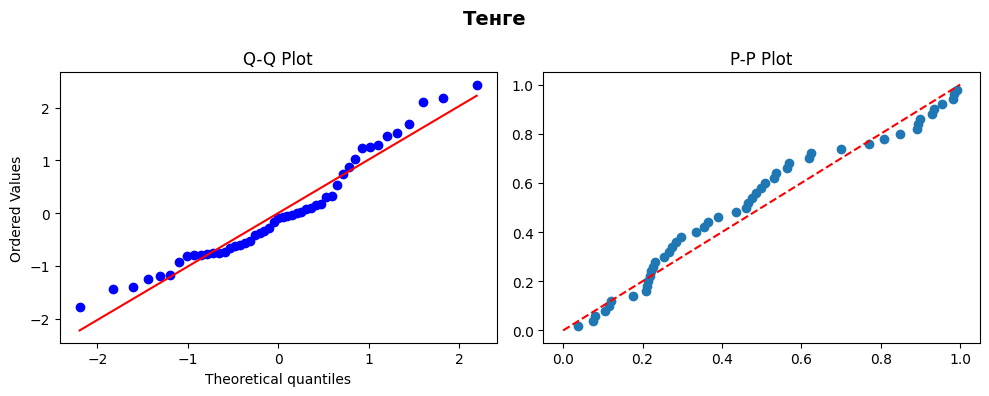

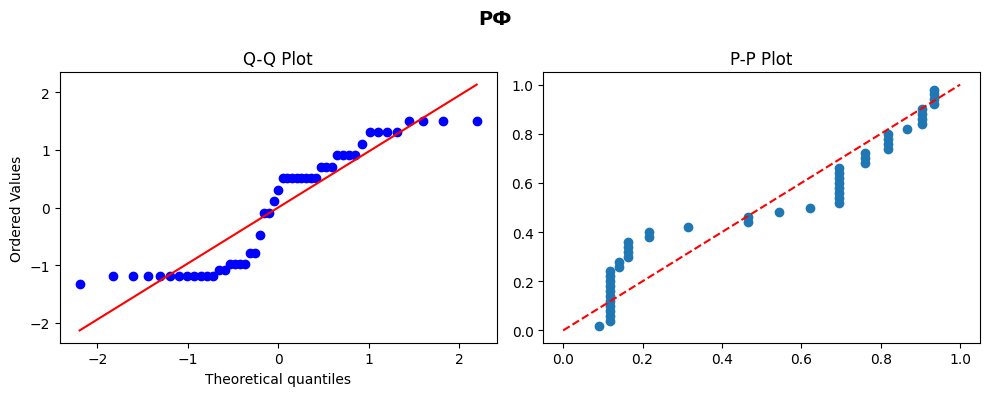

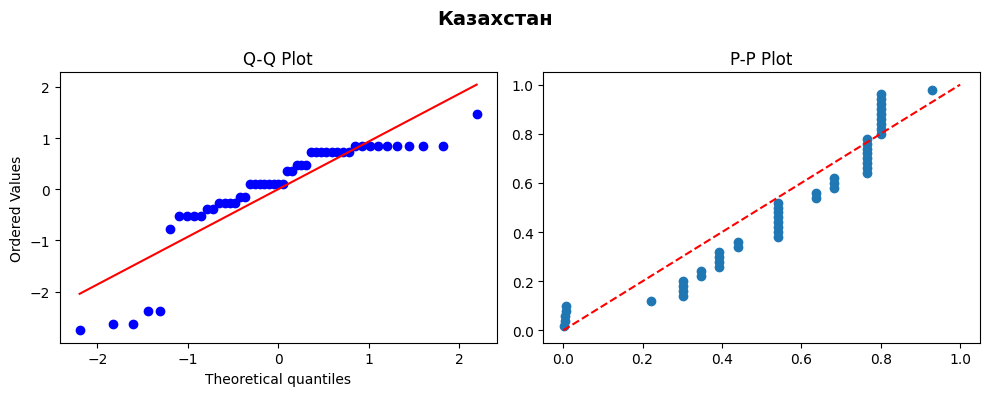

In [10]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Рубль', 'Тенге', 'РФ', 'Казахстан']

# --- Стандартизация ---
scaler = StandardScaler()
df_scaled = df1.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
print(df_scaled.head())

# --- Q-Q и P-P графики после стандартизации ---
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'{col}', fontsize=14, fontweight='bold')

    # Q-Q график
    plt.subplot(1, 2, 1)
    stats.probplot(df_scaled[col], dist="norm", plot=plt)
    plt.title('Q-Q Plot')

    # P-P график
    plt.subplot(1, 2, 2)
    data_sorted = np.sort(df_scaled[col].dropna())
    n = len(data_sorted)
    emp_probs = np.arange(1, n + 1) / (n + 1)
    theo_probs = stats.norm.cdf((data_sorted - np.mean(data_sorted)) / np.std(data_sorted))
    plt.plot(theo_probs, emp_probs, 'o')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('P-P Plot')

    plt.tight_layout()
    plt.show()


=== Рубль ===
Среднее: -0.0000
Медиана: 0.0143
Мода: -2.2376


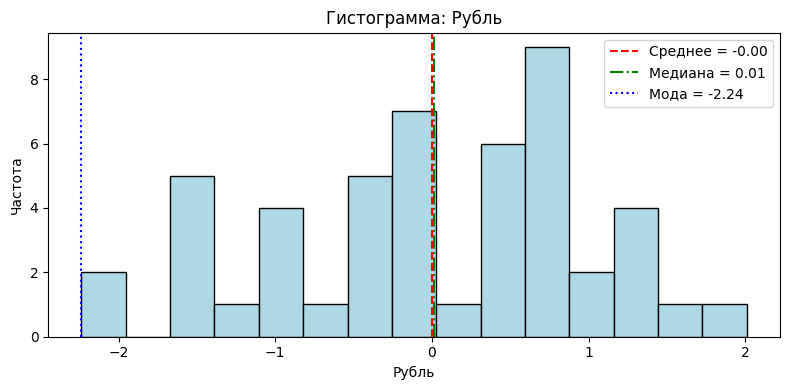


=== Тенге ===
Среднее: -0.0000
Медиана: -0.1004
Мода: -1.7872


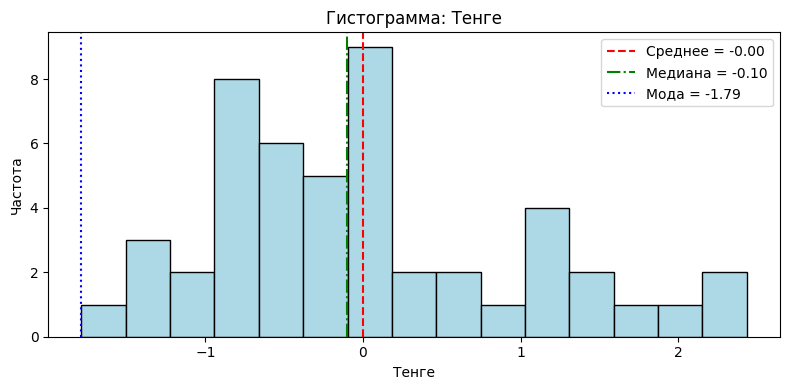


=== РФ ===
Среднее: -0.0000
Медиана: 0.3120
Мода: -1.1819


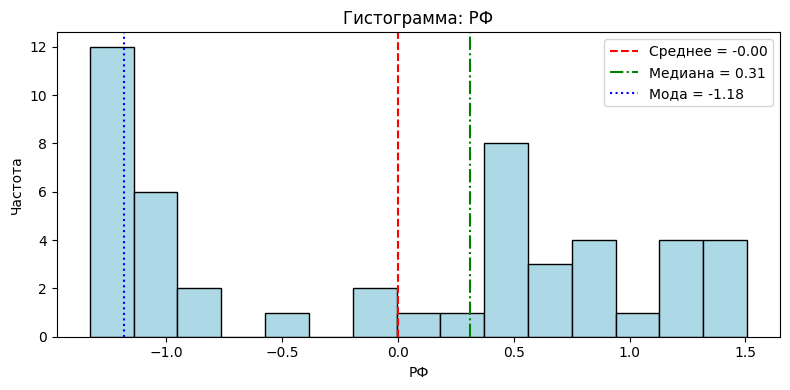


=== Казахстан ===
Среднее: -0.0000
Медиана: 0.1015
Мода: 0.8475


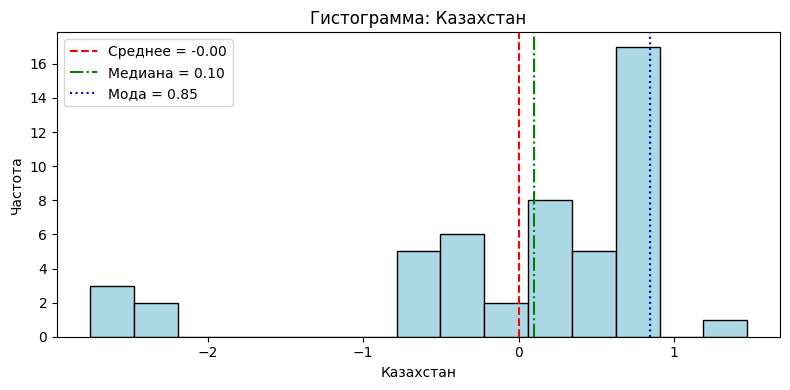

In [12]:
for col in numeric_cols:
    data = df_scaled[col].dropna()
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0] if not data.mode().empty else np.nan

    print(f'\n=== {col} ===')
    print(f'Среднее: {mean_val:.4f}')
    print(f'Медиана: {median_val:.4f}')
    print(f'Мода: {mode_val:.4f}')

    # --- Гистограмма ---
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=15, color='lightblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Среднее = {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', label=f'Медиана = {median_val:.2f}')
    plt.axvline(mode_val, color='blue', linestyle=':', label=f'Мода = {mode_val:.2f}')
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:
for col in numeric_cols:
    data = df_scaled[col].dropna()

    stat, p_value = stats.shapiro(data)

    print(f"\n--- {col} ---")
    print(f"Статистика Шапиро–Уилка: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Интерпретация
    if p_value > 0.05:
        print("Распределение не отличается от нормального (p > 0.05)")
    else:
        print("Распределение отклоняется от нормального (p ≤ 0.05)")


--- Рубль ---
Статистика Шапиро–Уилка: 0.9695
p-value: 0.2319
Распределение не отличается от нормального (p > 0.05)

--- Тенге ---
Статистика Шапиро–Уилка: 0.9495
p-value: 0.0353
Распределение отклоняется от нормального (p ≤ 0.05)

--- РФ ---
Статистика Шапиро–Уилка: 0.8607
p-value: 0.0000
Распределение отклоняется от нормального (p ≤ 0.05)

--- Казахстан ---
Статистика Шапиро–Уилка: 0.8039
p-value: 0.0000
Распределение отклоняется от нормального (p ≤ 0.05)


In [14]:
df_cleaned = df_scaled.copy()
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df_cleaned[col], nan_policy='omit'))
    df_cleaned = df_cleaned[z_scores < 3]

print(f"Размер выборки до очистки: {len(df_scaled)} строк")
print(f"Размер выборки после очистки: {len(df_cleaned)} строк")

print("\n=== Проверка нормальности после удаления выбросов (тест Шапиро–Уилка) ===")

for col in numeric_cols:
    data = df_cleaned[col].dropna()

    stat, p_value = stats.shapiro(data)

    print(f"\n--- {col} ---")
    print(f"Статистика Шапиро–Уилка: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    # Интерпретация
    if p_value > 0.05:
        print("После удаления выбросов распределение близко к нормальному (p > 0.05)")
    else:
        print("Даже после очистки распределение отклоняется от нормального (p ≤ 0.05)")

Размер выборки до очистки: 49 строк
Размер выборки после очистки: 49 строк

=== Проверка нормальности после удаления выбросов (тест Шапиро–Уилка) ===

--- Рубль ---
Статистика Шапиро–Уилка: 0.9695
p-value: 0.2319
После удаления выбросов распределение близко к нормальному (p > 0.05)

--- Тенге ---
Статистика Шапиро–Уилка: 0.9495
p-value: 0.0353
Даже после очистки распределение отклоняется от нормального (p ≤ 0.05)

--- РФ ---
Статистика Шапиро–Уилка: 0.8607
p-value: 0.0000
Даже после очистки распределение отклоняется от нормального (p ≤ 0.05)

--- Казахстан ---
Статистика Шапиро–Уилка: 0.8039
p-value: 0.0000
Даже после очистки распределение отклоняется от нормального (p ≤ 0.05)


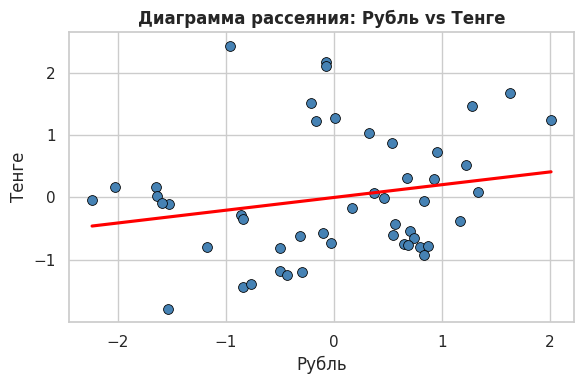

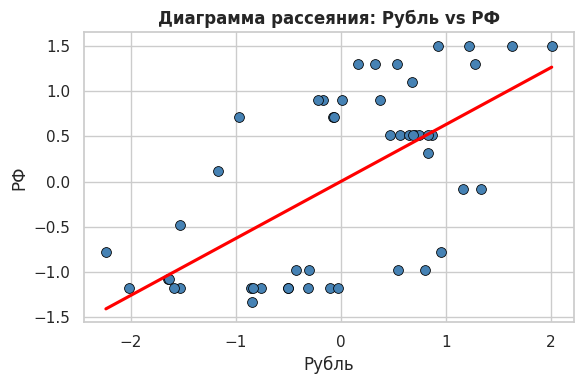

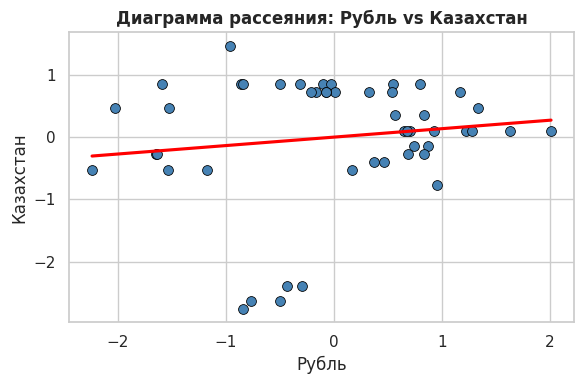

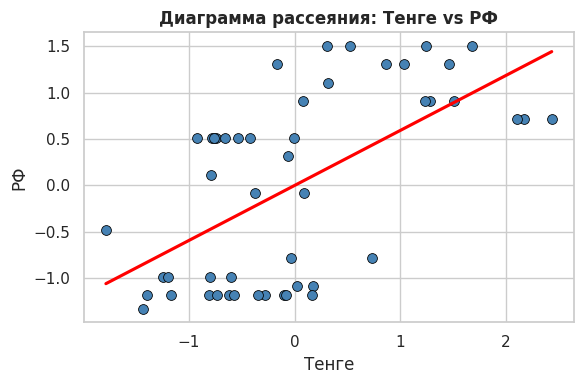

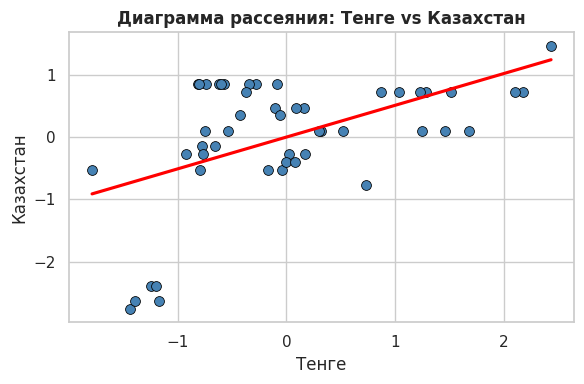

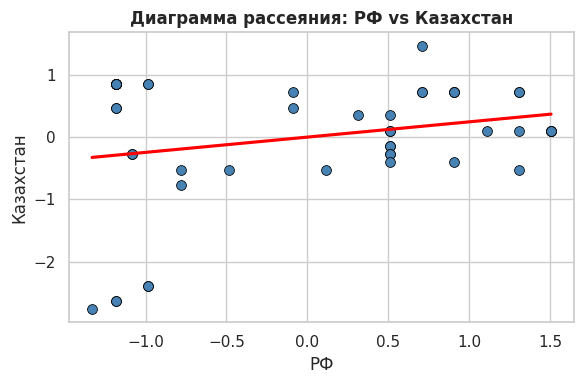

In [15]:
sns.set(style="whitegrid", font_scale=1.0)


for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        x_col = numeric_cols[i]
        y_col = numeric_cols[j]

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_scaled[x_col], y=df_scaled[y_col], color="steelblue", s=50, edgecolor="black")
        sns.regplot(x=df_scaled[x_col], y=df_scaled[y_col], scatter=False, color="red", ci=None)  # линейная аппроксимация
        plt.title(f"Диаграмма рассеяния: {x_col} vs {y_col}", fontsize=12, fontweight="bold")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.tight_layout()
        plt.show()

In [17]:
print("=== Корреляции между парами переменных ===")
import itertools
pairs = list(itertools.combinations(numeric_cols, 2))

for x_col, y_col in pairs:
    x = df_scaled[x_col]
    y = df_scaled[y_col]

    pearson_corr, pearson_p = stats.pearsonr(x, y)
    spearman_corr, spearman_p = stats.spearmanr(x, y)
    kendall_corr, kendall_p = stats.kendalltau(x, y)

    print(f"\n--- {x_col} vs {y_col} ---")
    print(f"Пирсон: r={pearson_corr:.4f}, p-value={pearson_p:.4f}")
    print(f"Спирмен: rho={spearman_corr:.4f}, p-value={spearman_p:.4f}")
    print(f"Кендалл: tau={kendall_corr:.4f}, p-value={kendall_p:.4f}")

=== Корреляции между парами переменных ===

--- Рубль vs Тенге ---
Пирсон: r=0.2049, p-value=0.1579
Спирмен: rho=0.2024, p-value=0.1630
Кендалл: tau=0.1156, p-value=0.2411

--- Рубль vs РФ ---
Пирсон: r=0.6311, p-value=0.0000
Спирмен: rho=0.6059, p-value=0.0000
Кендалл: tau=0.4105, p-value=0.0001

--- Рубль vs Казахстан ---
Пирсон: r=0.1358, p-value=0.3523
Спирмен: rho=0.0057, p-value=0.9689
Кендалл: tau=-0.0179, p-value=0.8619

--- Тенге vs РФ ---
Пирсон: r=0.5917, p-value=0.0000
Спирмен: rho=0.6157, p-value=0.0000
Кендалл: tau=0.4195, p-value=0.0000

--- Тенге vs Казахстан ---
Пирсон: r=0.5095, p-value=0.0002
Спирмен: rho=0.3394, p-value=0.0170
Кендалл: tau=0.2610, p-value=0.0111

--- РФ vs Казахстан ---
Пирсон: r=0.2447, p-value=0.0902
Спирмен: rho=-0.0468, p-value=0.7494
Кендалл: tau=-0.0047, p-value=0.9650


1. Рубль vs Тенге

Пирсон: r = 0.205, p = 0.158 → слабая положительная линейная связь, статистически незначимая.

Спирмен: rho = 0.202, p = 0.163 → слабая монотонная связь, незначимая.

Кендалл: tau = 0.116, p = 0.241 → слабая ранговая связь, незначимая.

Вывод: практически нет значимой связи между курсом Рубля и Тенге в этих данных.

2. Рубль vs РФ

Пирсон: r = 0.631, p < 0.001 → сильная положительная линейная связь, статистически значимая.

Спирмен: rho = 0.606, p < 0.001 → сильная монотонная связь.

Кендалл: tau = 0.411, p = 0.0001 → средняя ранговая связь.

Вывод: сильная положительная связь между Рублём и РФ. При росте одной валюты, другая тоже увеличивается. Все методы подтверждают значимость.

3. Рубль vs Казахстан

Пирсон: r = 0.136, p = 0.352 → очень слабая линейная связь, незначимая.

Спирмен: rho = 0.006, p = 0.969 → связь практически отсутствует.

Кендалл: tau = -0.018, p = 0.861 → отсутствие ранговой связи.

Вывод: нет статистически значимой связи между Рублём и Казахстаном.

4. Тенге vs РФ

Пирсон: r = 0.592, p < 0.001 → сильная положительная линейная связь.

Спирмен: rho = 0.616, p < 0.001 → сильная монотонная связь.

Кендалл: tau = 0.420, p < 0.001 → средняя ранговая связь.

Вывод: сильная взаимосвязь между Тенге и РФ.

5. Тенге vs Казахстан

Пирсон: r = 0.510, p = 0.0002 → умеренная положительная линейная связь.

Спирмен: rho = 0.339, p = 0.017 → слабая-модер. монотонная связь.

Кендалл: tau = 0.261, p = 0.011 → слабая ранговая связь.

Вывод: наблюдается умеренная положительная связь, статистически значимая. Пирсон показывает более сильную связь, чем ранговые методы — возможно, из-за линейной тенденции.

6. РФ vs Казахстан

Пирсон: r = 0.245, p = 0.090 → слабая линейная связь, статистически незначимая.

Спирмен: rho = -0.047, p = 0.749 → практически отсутствует монотонная связь.

Кендалл: tau = -0.005, p = 0.965 → связь отсутствует.

Вывод: нет значимой связи между РФ и Казахстаном.

2. Номинальные данные

In [2]:
import pandas as pd
df = pd.read_csv('/content/2016-FCC-New-Coders-Survey-Data.csv', low_memory=False)
mixed_columns = ['CodeEventOther', 'JobRoleInterestOther']

for col in mixed_columns:
    df[col] = df[col].astype('string')
df = df.convert_dtypes()
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: Int64(85), string(28)
memory usage: 14.7 MB
None
       Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
0       28                 0            <NA>                  <NA>   
1       22                 0            <NA>                  <NA>   
2       19                 0            <NA>                  <NA>   
3       26                 0            <NA>                  <NA>   
4       20                 0            <NA>                  <NA>   
...    ...               ...             ...                   ...   
15615   39                 0            <NA>                  <NA>   
15616   27                 0            <NA>                  <NA>   
15617   37                 0            <NA>                  <NA>   
15618   26                 0            <NA>                  <NA>   
15619   22                 0            <NA>         

In [3]:
df = df[['EmploymentField','EmploymentStatus', 'Gender', 'LanguageAtHome', 'JobWherePref', 'SchoolDegree', 'Income']]
df.head()

,EmploymentField,EmploymentStatus,Gender,LanguageAtHome,JobWherePref,SchoolDegree,Income
0,office and administrative support,Employed for wages,male,English,<NA>,"some college credit, no degree",32000
1,food and beverage,Employed for wages,male,English,in an office with other developers,"some college credit, no degree",15000
2,finance,Employed for wages,male,English,<NA>,high school diploma or equivalent (GED),48000
3,"arts, entertainment, sports, or media",Employed for wages,female,English,from home,bachelor's degree,43000
4,education,Employed for wages,female,Khmer,in an office with other developers,"some college credit, no degree",6000


In [4]:
df = df[df['Gender'].isin(['male', 'female'])]
for col in df.columns:
    df = df[df[col].notna()]
df.head()


,EmploymentField,EmploymentStatus,Gender,LanguageAtHome,JobWherePref,SchoolDegree,Income
1,food and beverage,Employed for wages,male,English,in an office with other developers,"some college credit, no degree",15000
3,"arts, entertainment, sports, or media",Employed for wages,female,English,from home,bachelor's degree,43000
4,education,Employed for wages,female,Khmer,in an office with other developers,"some college credit, no degree",6000
28,software development,Employed for wages,male,English,from home,bachelor's degree,75000
39,law enforcement and fire and rescue,Employed for wages,male,English,in an office with other developers,associate's degree,53000


In [5]:
pairs = [
    ('Gender', 'SchoolDegree'),
    ('Gender', 'JobWherePref'),
    ('JobWherePref', 'LanguageAtHome'),
    ('EmploymentField', 'LanguageAtHome'),
    ('EmploymentStatus', 'LanguageAtHome')
]

for x, y in pairs:
    print(f"\n=== {x} vs {y} ===")

    table = pd.crosstab(df[x], df[y])
    print("\nТаблица сопряжённости:")
    print(table)

    chi2, p, dof, expected = chi2_contingency(table, correction=False)
    expected_df = pd.DataFrame(expected, index=table.index, columns=table.columns)

    print("\nОжидаемые значения (expected frequencies):")
    print(expected_df.round(2))


=== Gender vs SchoolDegree ===

Таблица сопряжённости:
SchoolDegree  Ph.D.  associate's degree  bachelor's degree  \
Gender                                                       
female            5                  21                285   
male             19                 103                678   

SchoolDegree  high school diploma or equivalent (GED)  \
Gender                                                  
female                                             16   
male                                              126   

SchoolDegree  master's degree (non-professional)  \
Gender                                             
female                                        83   
male                                         172   

SchoolDegree  no high school (secondary school)  \
Gender                                            
female                                        0   
male                                         10   

SchoolDegree  professional degree (MBA, MD, JD, etc.

Gender vs SchoolDegree — χ² Пирсона, таблица небольшая, почти все ожидаемые частоты ≥5.
Gender vs JobWherePref  — χ² Пирсона, ожидаемые частоты >5.
JobWherePref vs LanguageAtHome — разрежённая таблица, много ячеек с 0 → обычный χ² ненадёжен, используем точный тест Фримана-Холтона с приближением Монте-Карло.
EmploymentField vs LanguageAtHome — очень разрежённая → тот же метод.
EmploymentStatus vs LanguageAtHome — разрежённая → тот же метод.

In [8]:
import math

# Функция для Cramér's V
def cramers_v(chi2, n, r, k):
    phi2 = chi2 / n
    return np.sqrt(phi2 / min(r-1, k-1))

# --- a) Gender vs SchoolDegree ---
ct_gender_school = pd.crosstab(df['Gender'], df['SchoolDegree'])
chi2, p, dof, expected = chi2_contingency(ct_gender_school, correction=False)
print("=== Gender vs SchoolDegree ===")
print("Chi2:", chi2, "p-value:", p)
print("Cramér's V:", cramers_v(chi2, ct_gender_school.values.sum(), *ct_gender_school.shape), "\n")

# --- b) Gender vs JobWherePref ---
ct_gender_job = pd.crosstab(df['Gender'], df['JobWherePref'])
chi2, p, dof, expected = chi2_contingency(ct_gender_job, correction=False)
print("=== Gender vs JobWherePref ===")
print("Chi2:", chi2, "p-value:", p)
print("Cramér's V:", cramers_v(chi2, ct_gender_job.values.sum(), *ct_gender_job.shape), "\n")

# --- c) JobWherePref vs LanguageAtHome ---
ct_job_lang = pd.crosstab(df['JobWherePref'], df['LanguageAtHome'])
print("=== JobWherePref vs LanguageAtHome ===")
try:
    import rpy2.robjects as ro
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    r_ct = pandas2ri.py2rpy(ct_job_lang)
    p_val_mc = ro.r['fisher.test'](r_ct, simulate_p_value=True, B=10000)
    print("Monte Carlo Fisher Freeman-Halton p-value:", p_val_mc.rx2('p.value')[0], "\n")
except:
    print("rpy2 не установлен — Monte Carlo точный тест не выполнен.\n")

# --- d) EmploymentField vs LanguageAtHome ---
ct_field_lang = pd.crosstab(df['EmploymentField'], df['LanguageAtHome'])
print("=== EmploymentField vs LanguageAtHome ===")
try:
    r_ct = pandas2ri.py2rpy(ct_field_lang)
    p_val_mc = ro.r['fisher.test'](r_ct, simulate_p_value=True, B=10000)
    print("Monte Carlo Fisher Freeman-Halton p-value:", p_val_mc.rx2('p.value')[0], "\n")
except:
    print("rpy2 не установлен — Monte Carlo точный тест не выполнен.\n")

# --- e) EmploymentStatus vs LanguageAtHome ---
ct_status_lang = pd.crosstab(df['EmploymentStatus'], df['LanguageAtHome'])
print("=== EmploymentStatus vs LanguageAtHome ===")
try:
    r_ct = pandas2ri.py2rpy(ct_status_lang)
    p_val_mc = ro.r['fisher.test'](r_ct, simulate_p_value=True, B=10000)
    print("Monte Carlo Fisher Freeman-Halton p-value:", p_val_mc.rx2('p.value')[0])
except:
    print("rpy2 не установлен — Monte Carlo точный тест не выполнен.")


=== Gender vs SchoolDegree ===
Chi2: 71.46768590197054 p-value: 7.843715040043118e-12
Cramér's V: 0.1827887520183035 

=== Gender vs JobWherePref ===
Chi2: 7.003094225798077 p-value: 0.030150700781877687
Cramér's V: 0.05721891160820782 

=== JobWherePref vs LanguageAtHome ===
Monte Carlo Fisher Freeman-Halton p-value: 0.8123187681231877 

=== EmploymentField vs LanguageAtHome ===
Monte Carlo Fisher Freeman-Halton p-value: 0.23717628237176283 

=== EmploymentStatus vs LanguageAtHome ===
Monte Carlo Fisher Freeman-Halton p-value: 9.999000099990002e-05


| Cramér's V | Связь между переменными        |
| ---------- | ------------------------------ |
| 0 – 0.1    | Очень слабая / почти нет связи |
| 0.1 – 0.3  | Слабая связь                   |
| 0.3 – 0.5  | Средняя связь                  |
| 0.5 – 1.0  | Сильная связь                  |


Gender vs SchoolDegree
Chi2 = 71.47, p-value ≈ 7.8e-12, Cramér's V = 0.183
p-value крайне мала → связь между полом и уровнем образования статистически значима.

Cramér's V ≈ 0.18 → слабая, но заметная связь.
→ Женщины и мужчины различаются в распределении уровней образования, но различие не очень сильное.

Gender vs JobWherePref
Chi2 = 7.00, p-value ≈ 0.03, Cramér's V ≈ 0.057
p-value < 0.05 → связь статистически значима, но очень слабая.
Cramér's V ≈ 0.057 → фактически почти нет практической связи.
→ Пол не сильно влияет на предпочтения работы (удалёнка/офис/нет предпочтений).

JobWherePref vs LanguageAtHome
Monte Carlo p-value ≈ 0.81
p-value > 0.05 → нет статистически значимой связи.
→ Предпочтения работы не зависят от языка, на котором человек говорит дома.

EmploymentField vs LanguageAtHome
Monte Carlo p-value ≈ 0.24
Интерпретация:
p-value > 0.05 → связь не значима.
→ Род деятельности не зависит от домашнего языка (нет доказательств различий).

EmploymentStatus vs LanguageAtHome
Monte Carlo p-value ≈ 1e-4
p-value << 0.05 → связь статистически значима.
→ Статус занятости (работающий на зарплату, самозанятый, фрилансер) зависит от языка, на котором говорят дома.